In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
df = pd.read_csv('../../data/h01_1600_synapses_within_branch.csv', 
                 sep=',', index_col=0)
df

,##n,x,y,z,swc_id,synapse2bif,branch_length,branch_id
0,28,2219.42,645.344,31.614,1069946936_sort.swc,0.000000,-1.000000,-10.0
1,30,2219.81,644.832,31.713,1069946936_sort.swc,0.652007,22.687595,29.0
2,38,2220.45,642.976,33.363,1069946936_sort.swc,3.256354,22.687595,29.0
3,45,2221.79,641.280,33.033,1069946936_sort.swc,5.525040,22.687595,29.0
4,56,2223.23,638.912,32.142,1069946936_sort.swc,9.547725,22.687595,29.0
...,...,...,...,...,...,...,...,...
2551182,18187,2677.47,741.120,15.939,985320716_sort.swc,25.930673,81.737602,18137.0
2551183,18190,2676.93,741.696,15.378,985320716_sort.swc,26.900968,81.737602,18137.0
2551184,18197,2675.46,742.880,14.322,985320716_sort.swc,29.092144,81.737602,18137.0
2551185,18210,2673.92,745.984,12.375,985320716_sort.swc,33.221384,81.737602,18137.0


In [3]:
df['range'] = df['synapse2bif'] / df['branch_length']

df[['type']] = 'n'
df.loc[df['range']>=0.66, 'type'] = 'end'
df.loc[df['range']<=0.33, 'type'] = 'start'
df.loc[(df['range']>0.33)&(df['range']<0.66), 'type'] = 'middle'

df

,##n,x,y,z,swc_id,synapse2bif,branch_length,branch_id,range,type
0,28,2219.42,645.344,31.614,1069946936_sort.swc,0.000000,-1.000000,-10.0,-0.000000,start
1,30,2219.81,644.832,31.713,1069946936_sort.swc,0.652007,22.687595,29.0,0.028738,start
2,38,2220.45,642.976,33.363,1069946936_sort.swc,3.256354,22.687595,29.0,0.143530,start
3,45,2221.79,641.280,33.033,1069946936_sort.swc,5.525040,22.687595,29.0,0.243527,start
4,56,2223.23,638.912,32.142,1069946936_sort.swc,9.547725,22.687595,29.0,0.420835,middle
...,...,...,...,...,...,...,...,...,...,...
2551182,18187,2677.47,741.120,15.939,985320716_sort.swc,25.930673,81.737602,18137.0,0.317243,start
2551183,18190,2676.93,741.696,15.378,985320716_sort.swc,26.900968,81.737602,18137.0,0.329114,start
2551184,18197,2675.46,742.880,14.322,985320716_sort.swc,29.092144,81.737602,18137.0,0.355921,middle
2551185,18210,2673.92,745.984,12.375,985320716_sort.swc,33.221384,81.737602,18137.0,0.406439,middle


In [4]:
# df.pivot_table(index='target_cell', columns = ['type'], values=[''])

In [5]:
long_df = pd.crosstab(df['swc_id'], df['type']).stack().reset_index()
long_df.columns = ['target_cell', 'type', 'counts']
long_df

,target_cell,type,counts
0,1069946936_sort.swc,end,175
1,1069946936_sort.swc,middle,196
2,1069946936_sort.swc,start,162
3,1086242342_sort.swc,end,382
4,1086242342_sort.swc,middle,406
...,...,...,...
4795,955432427_sort.swc,middle,0
4796,955432427_sort.swc,start,0
4797,985320716_sort.swc,end,451
4798,985320716_sort.swc,middle,490


In [6]:
long_df['probability'] = long_df['counts'].copy()

for i in tqdm(np.unique(long_df['target_cell'])):
    tmp_df = long_df[long_df['target_cell'] == i]
    tmp_sum = np.sum(tmp_df['counts'])
    long_df.loc[tmp_df.index, 'probability'] = long_df.loc[tmp_df.index, 'probability'] / tmp_sum

long_df

  0%|                                                  | 0/1600 [00:00<?, ?it/s]/tmp/ipykernel_37329/4179510775.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.32833021 0.36772983 0.30393996]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  long_df.loc[tmp_df.index, 'probability'] = long_df.loc[tmp_df.index, 'probability'] / tmp_sum
100%|█████████████████████████████████████| 1600/1600 [00:01<00:00, 1371.89it/s]


,target_cell,type,counts,probability
0,1069946936_sort.swc,end,175,0.328330
1,1069946936_sort.swc,middle,196,0.367730
2,1069946936_sort.swc,start,162,0.303940
3,1086242342_sort.swc,end,382,0.325383
4,1086242342_sort.swc,middle,406,0.345826
...,...,...,...,...
4795,955432427_sort.swc,middle,0,0.000000
4796,955432427_sort.swc,start,0,0.000000
4797,985320716_sort.swc,end,451,0.326339
4798,985320716_sort.swc,middle,490,0.354559


/tmp/ipykernel_37329/314437696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=long_df, x='type',


(0.22, 0.45)

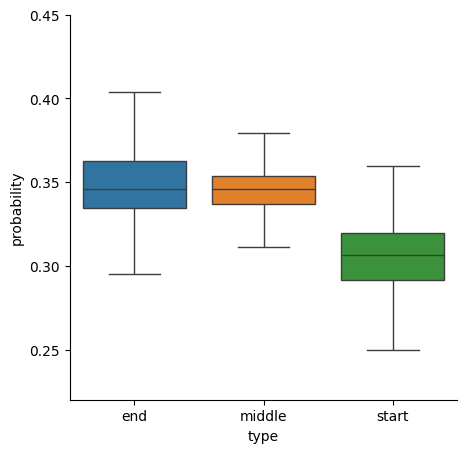

In [7]:
f,ax = plt.subplots(1,1,figsize=(5,5))
sns.boxplot(data=long_df, x='type', 
            y='probability', fliersize=0,
            palette='tab10'
           )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.ylim([0.22, .45])
#plt.savefig('./branch_inner_distribution_h01.jpg', dpi=400, bbox_inches='tight')